In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\sample data\student_dataset.csv")
df.head()

,student_id,gender,age,study_hours,attendance_percentage,internal_marks,assignment_score,previous_cgpa,extracurricular,internet_access,family_income,final_exam_marks
0,1,Male,18,3,76,22,6,5.01,Yes,Yes,High,67
1,2,Female,18,5,66,21,9,9.84,No,Yes,High,82
2,3,Male,20,6,58,14,5,5.03,No,Yes,Medium,54
3,4,Male,23,1,82,15,11,5.52,Yes,No,High,54
4,5,Male,19,5,69,35,5,6.57,No,Yes,Medium,80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   gender                 300 non-null    object 
 2   age                    300 non-null    int64  
 3   study_hours            300 non-null    int64  
 4   attendance_percentage  300 non-null    int64  
 5   internal_marks         300 non-null    int64  
 6   assignment_score       300 non-null    int64  
 7   previous_cgpa          300 non-null    float64
 8   extracurricular        300 non-null    object 
 9   internet_access        300 non-null    object 
 10  family_income          300 non-null    object 
 11  final_exam_marks       300 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 28.3+ KB


In [4]:
df.describe()

,student_id,age,study_hours,attendance_percentage,internal_marks,assignment_score,previous_cgpa,final_exam_marks
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,20.950000,3.883333,74.903333,24.156667,11.806667,7.534333,74.360000
std,86.746758,2.021829,1.927548,15.230250,9.215306,4.610874,1.539263,13.196878
min,1.000000,18.000000,1.000000,50.000000,10.000000,5.000000,5.000000,37.000000
25%,75.750000,19.000000,2.000000,62.000000,16.000000,8.000000,6.147500,65.750000
50%,150.500000,21.000000,4.000000,75.000000,23.000000,11.000000,7.610000,74.000000
75%,225.250000,23.000000,5.000000,87.000000,32.000000,16.000000,8.865000,83.000000
max,300.000000,24.000000,7.000000,100.000000,40.000000,20.000000,10.000000,100.000000


In [5]:
#df.info() gives the data that there are 4 objects that are needed to be converted into categorical to numerical

In [6]:
#for checking missing values
df.isnull().sum()

student_id               0
gender                   0
age                      0
study_hours              0
attendance_percentage    0
internal_marks           0
assignment_score         0
previous_cgpa            0
extracurricular          0
internet_access          0
family_income            0
final_exam_marks         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
#for checking duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [10]:
df.shape

(300, 12)

In [11]:
# Our target variable for this dataset is final_exam_marks

# Outlier Detection and Removal

In [13]:
# To check the We will use boxplot

Outliers are usually checked in numerical columns, not categorical ones.

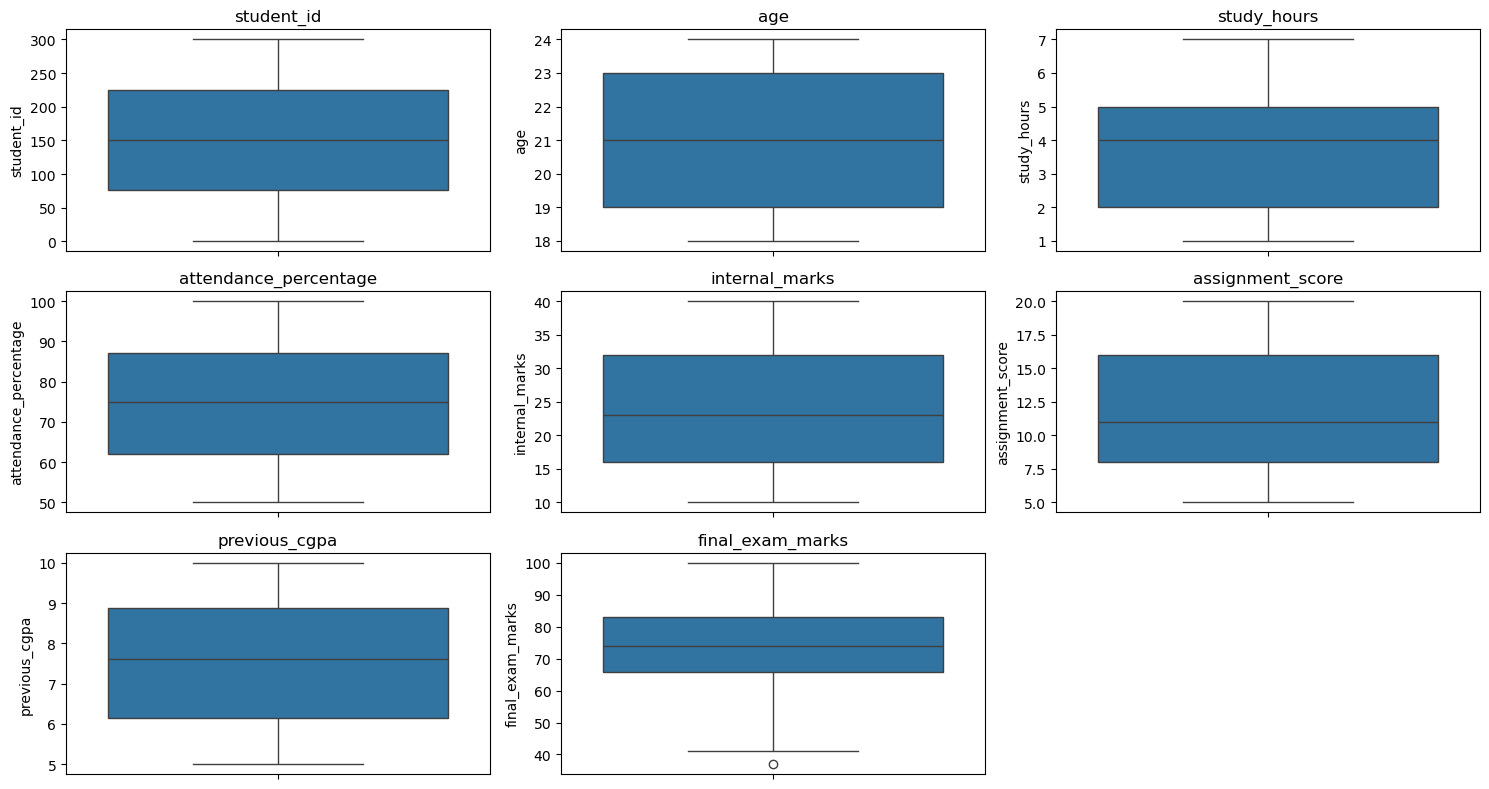

In [15]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(15,8)) #What it does:,Creates a big figure (canvas),Width = 15,Height = 8,This makes plots bigger and clearer.
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()  #Adjusts spacing automatically and Prevents overlapping of plots
plt.show()

In [20]:
#There is one outlier in final_exam_marks and we can confirm it using IQR method
Q1 = df['final_exam_marks'].quantile(0.25)
Q3 = df['final_exam_marks'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [21]:
#There is only one row confirmed using IQR method

In [23]:
df = df[(df['final_exam_marks'] >= lower_limit) & 
        (df['final_exam_marks'] <= upper_limit)]

In [25]:
df.shape

(299, 12)

In [26]:
# Out of 300 rows there are only showing 299 rows it means the outlier is removed
#To prove it use boxplot

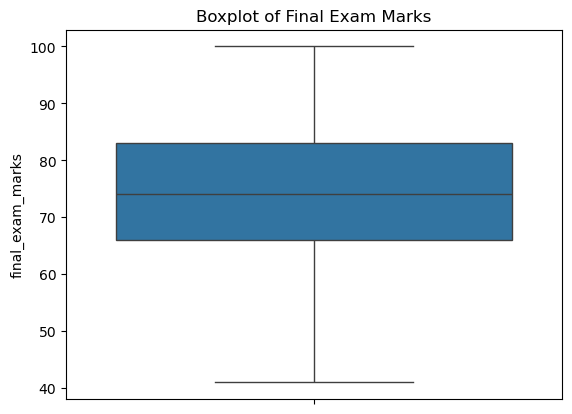

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['final_exam_marks'])
plt.title('Boxplot of Final Exam Marks')
plt.show()

In [28]:
#It is showing no outlier as it is being removed

# Converting Categorical Data to Numerical Data

In [29]:
df.columns

Index(['student_id', 'gender', 'age', 'study_hours', 'attendance_percentage',
       'internal_marks', 'assignment_score', 'previous_cgpa',
       'extracurricular', 'internet_access', 'family_income',
       'final_exam_marks'],
      dtype='object')

In [30]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'extracurricular', 'internet_access', 'family_income'], dtype='object')

In [31]:
# How to get ordinal and nominal columns? : For that we will check unique values
for col in df.select_dtypes(include=['object']).columns:
    print(col)
    print(df[col].unique())
    print("-------------")

gender
['Male' 'Female']
-------------
extracurricular
['Yes' 'No']
-------------
internet_access
['Yes' 'No']
-------------
family_income
['High' 'Medium' 'Low']
-------------


For nominal there should be only two possible values : 0 and 1,pass or fail , true ya false etc

Here nominal columns are gender,extracurricular,internet_access

We will use One Hot Encoding

In [32]:
df = pd.get_dummies(df, columns=['gender','internet_access','extracurricular'], drop_first=True)

For ordinal columns there should be 3 or more possible values:

Here they are family_income

So we will use Label Encoding

In [33]:
# We will use manual mapping
income_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

df['family_income'] = df['family_income'].map(income_mapping)

After encoding check for unique values if gives numerical values means we have successfully converted categorical column to numerical

In [34]:
df['family_income'].unique()

array([2, 1, 0])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             299 non-null    int64  
 1   age                    299 non-null    int64  
 2   study_hours            299 non-null    int64  
 3   attendance_percentage  299 non-null    int64  
 4   internal_marks         299 non-null    int64  
 5   assignment_score       299 non-null    int64  
 6   previous_cgpa          299 non-null    float64
 7   family_income          299 non-null    int64  
 8   final_exam_marks       299 non-null    int64  
 9   gender_Male            299 non-null    bool   
 10  internet_access_Yes    299 non-null    bool   
 11  extracurricular_Yes    299 non-null    bool   
dtypes: bool(3), float64(1), int64(8)
memory usage: 24.2 KB


In [36]:
# There is no objects or no categorical columns 

# Correlation Matrix(Showed using HeatMap)

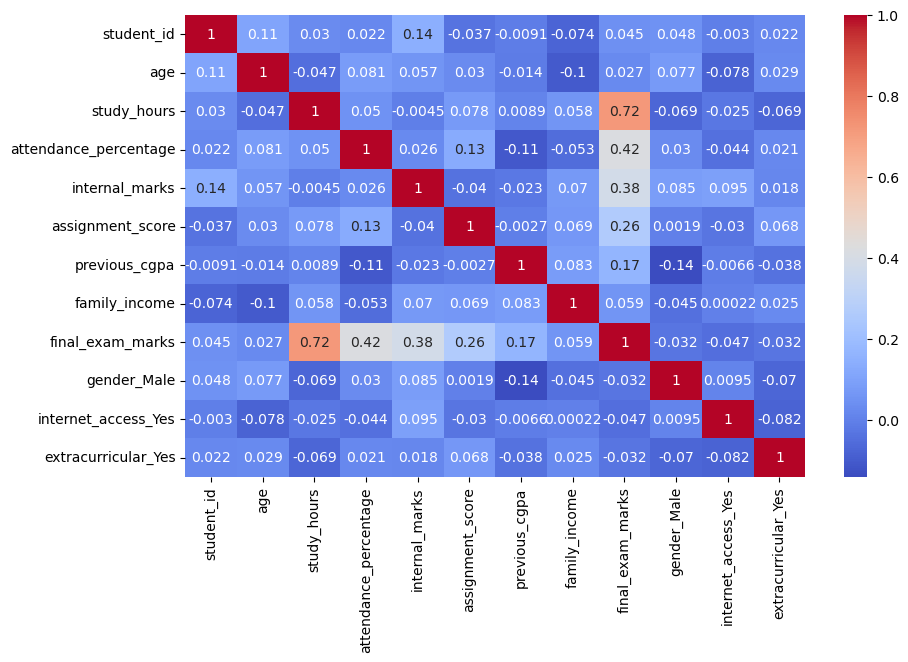

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution Of Target Variable

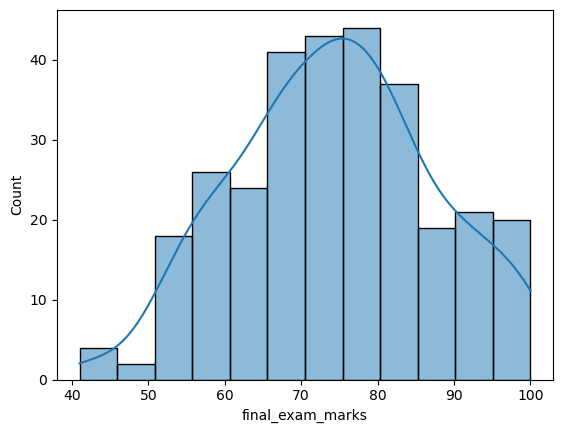

In [39]:
sns.histplot(df['final_exam_marks'], kde=True)
plt.show()

# Study Hours vs Final Marks

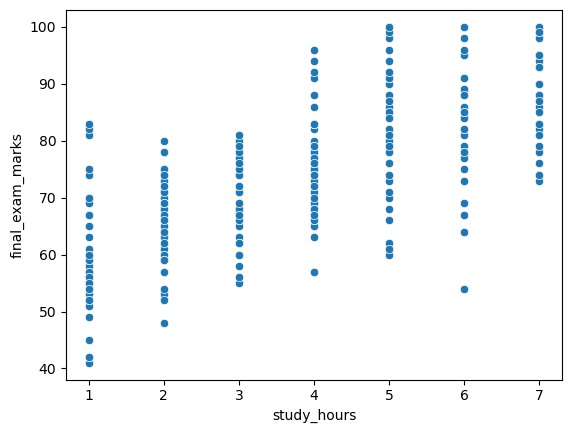

In [40]:
sns.scatterplot(x=df['study_hours'], y=df['final_exam_marks'])
plt.show()

# Attendance vs Final Marks

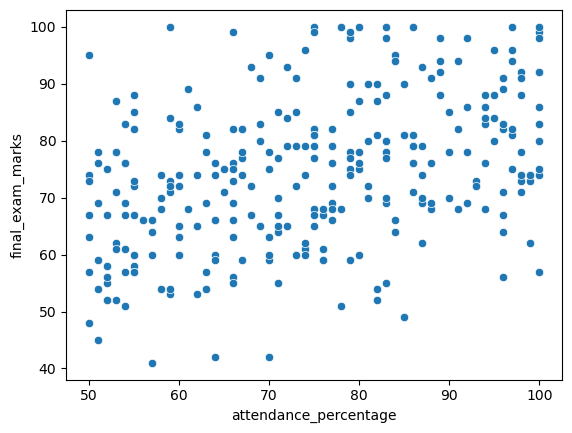

In [42]:
sns.scatterplot(x=df['attendance_percentage'], y=df['final_exam_marks'])
plt.show()

# Gender vs Final Marks

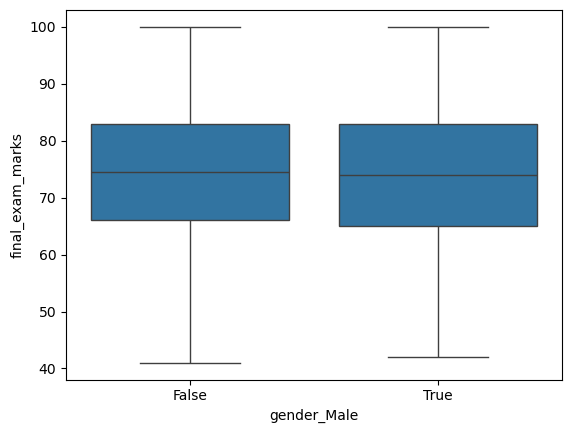

In [45]:
sns.boxplot(x=df['gender_Male'], y=df['final_exam_marks'])
plt.show()

# Family Income vs Final Marks

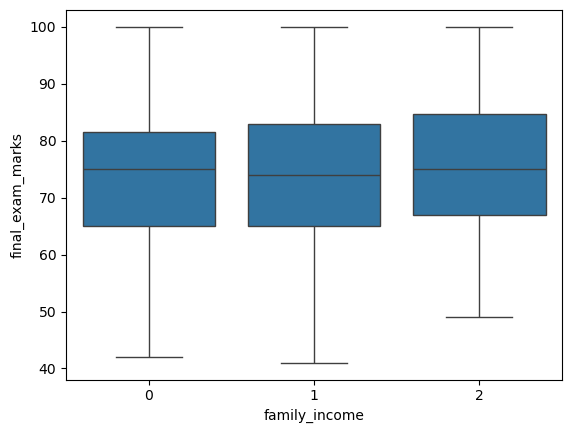

In [46]:
sns.boxplot(x=df['family_income'], y=df['final_exam_marks'])
plt.show()

# Simple Student Dashboard

In [50]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Page configuration
st.set_page_config(page_title="Student Performance Dashboard", layout="wide")

# Title
st.markdown("<h1 style='text-align: center; color: #4CAF50;'>📊 Student Performance Analysis Dashboard</h1>", unsafe_allow_html=True)

st.markdown("---")

# ===============================
# Sidebar Filters
# ===============================
st.sidebar.header("🔎 Filter Options")

min_hours = int(df['study_hours'].min())
max_hours = int(df['study_hours'].max())

selected_hours = st.sidebar.slider(
    "Select Study Hours Range",
    min_value=min_hours,
    max_value=max_hours,
    value=(min_hours, max_hours)
)

filtered_df = df[(df['study_hours'] >= selected_hours[0]) & 
                 (df['study_hours'] <= selected_hours[1])]

# ===============================
# Key Metrics Section
# ===============================
st.subheader("📌 Key Performance Indicators")

col1, col2, col3 = st.columns(3)

col1.metric("Total Students", len(filtered_df))
col2.metric("Average Marks", round(filtered_df['final_exam_marks'].mean(), 2))
col3.metric("Highest Marks", filtered_df['final_exam_marks'].max())

st.markdown("---")

# ===============================
# Dataset Preview
# ===============================
with st.expander("📂 View Dataset"):
    st.dataframe(filtered_df)

# ===============================
# Visualizations Section
# ===============================
st.subheader("📈 Visual Analysis")

col1, col2 = st.columns(2)

# Scatter Plot
with col1:
    st.markdown("### Study Hours vs Final Marks")
    fig1, ax1 = plt.subplots()
    sns.scatterplot(x=filtered_df['study_hours'], 
                    y=filtered_df['final_exam_marks'], 
                    hue=filtered_df['final_exam_marks'],
                    palette="viridis",
                    ax=ax1)
    st.pyplot(fig1)

# Histogram
with col2:
    st.markdown("### Distribution of Final Marks")
    fig2, ax2 = plt.subplots()
    sns.histplot(filtered_df['final_exam_marks'], 
                 kde=True, 
                 color='skyblue',
                 ax=ax2)
    st.pyplot(fig2)

st.markdown("---")

# ===============================
# Correlation Heatmap
# ===============================
st.subheader("🔗 Correlation Heatmap")

fig3, ax3 = plt.subplots(figsize=(8,5))
sns.heatmap(filtered_df.corr(numeric_only=True),
            annot=True,
            cmap="coolwarm",
            ax=ax3)
st.pyplot(fig3)

st.markdown("---")

# ===============================
# Insights Section
# ===============================
st.subheader("💡 Key Insights")

st.success("""
• Students who study more hours tend to score higher marks.  
• There is a positive correlation between study hours and final exam marks.  
• Marks distribution appears moderately spread with few high performers.  
""")

st.markdown("<center>🚀 Built with Streamlit</center>", unsafe_allow_html=True)

2026-02-21 23:25:05.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-21 23:25:05.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-21 23:25:05.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-21 23:25:05.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-21 23:25:05.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-21 23:25:05.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-21 23:25:05.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-21 23:25:06.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [48]:
import os
os.getcwd()

'C:\\Users\\KUNDAN KUMAR\\Documents\\PROJECT AIML'

In [51]:
!jupyter nbconvert --to script Project_1.ipynb

[NbConvertApp] Converting notebook Project_1.ipynb to script
[NbConvertApp] Writing 7112 bytes to Project_1.py
